---

![ExposysDataLabs](logo.png)
<p style='text-align: center;'> EXPOSYS DATA LABS</p>
<h1 align="center">Customer Segmentation</h1> 
<h4 align='center'>using K-means clustering</h4>
<div style="text-align: right">created<br>
-- by Mayur R. Machhi<br>
-- for Exposys Data Labs</div>

---

### 1. Importing the libraries and the data

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

---

### 2. Importing the data from .csv file

In [418]:
#Loading the data in a pandas DataFrame
data = pd.read_csv('Mall_Customers.csv')

In [419]:
#Viewing pandas dataframe object
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---

### 3. Viewing and Describing the data

In [420]:
#Viewing Head and Tail of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [421]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [422]:
#checking the sample size of data - how many samples are there in the dataset
len(data)

200

In [423]:
#checking the dimensions/shape of the dataset
data.shape

(200, 5)

In [424]:
#Viewing Column names
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [425]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is CustomerID
Column number 2 is Gender
Column number 3 is Age
Column number 4 is Annual Income (k$)
Column number 5 is Spending Score (1-100)


In [426]:
#view datatypes of each column in the dataset
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [427]:
#Further information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [428]:
#describing the data as basic statistics
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [429]:
# from sklearn.preprocessing import LabelEncoder
  
# # label_encoder object knows how to understand word labels. 
# label_encoder = LabelEncoder() 
  
# # Encode labels in column 'species'. 
# data['Gender']= label_encoder.fit_transform(data['Gender']) 
  
# data

### 4. Checking the data for inconsistencies and further cleaning the data if needed.

In [430]:
#checking data for missing values
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [431]:
# checking summary of missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [432]:
# the customer_id column has no relevence therefore deleting it would be better
data = data.drop('CustomerID', axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [433]:
#cleaning the data labels (Annual income and Spending Score)
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [434]:
# # the annual income has inconsistent data as it shoulb be in 'Thousands'
# data['Annual_Income'] = data['Annual_Income'] *  1000
# data.head()

#### NOTE : Data doesnt have any missing values so it is clean, and therefore no need for cleaning the data

### 5. Understanding and Visualizing Data

In [435]:
#Finding Corelations in the data and columns
corr = data.corr()
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


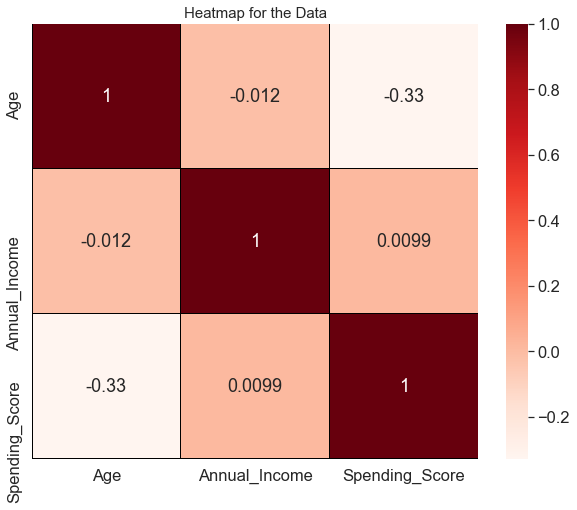

In [436]:
# Plotting the heatmap of correlation of all the columns of the dataset

fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True,linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

#### 5.1. Gender Data Visualization

In [437]:
#First we take a look at the gender column of the dataset
data['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [438]:
# Data type of the column
data['Gender'].dtype

dtype('O')

In [439]:
# Finding the unique values in the column
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [440]:
# Counts of each type in the Gender Column
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

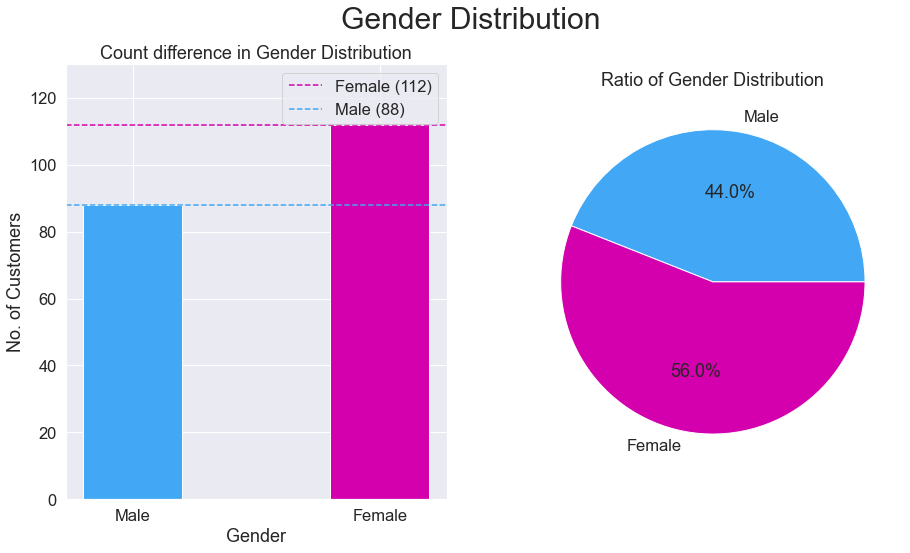

In [441]:
# Plotting Gender Distribution on Bar graph and the ratio of distribution using Pie Chart.
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

#### 5.2. Age Data Visualization

In [442]:
#First we take a look at the age column of the dataset
data['Age'].head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [443]:
# Data type of the column
data['Age'].dtype

dtype('int64')

In [444]:
# Finding the unique values in the column
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [445]:
# Statistical Description of the Age column
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

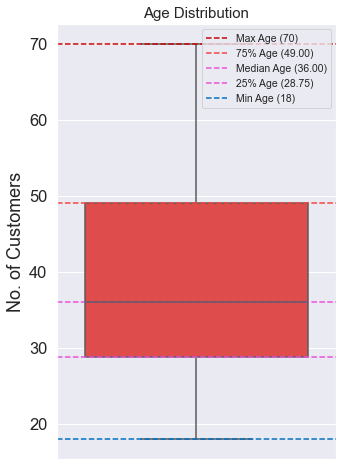

In [446]:
#Visualizing Statistical Description of the Age
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 15)
plt.show()

In [447]:
# Counts of first five max age in the Age Column
data['Age'].value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

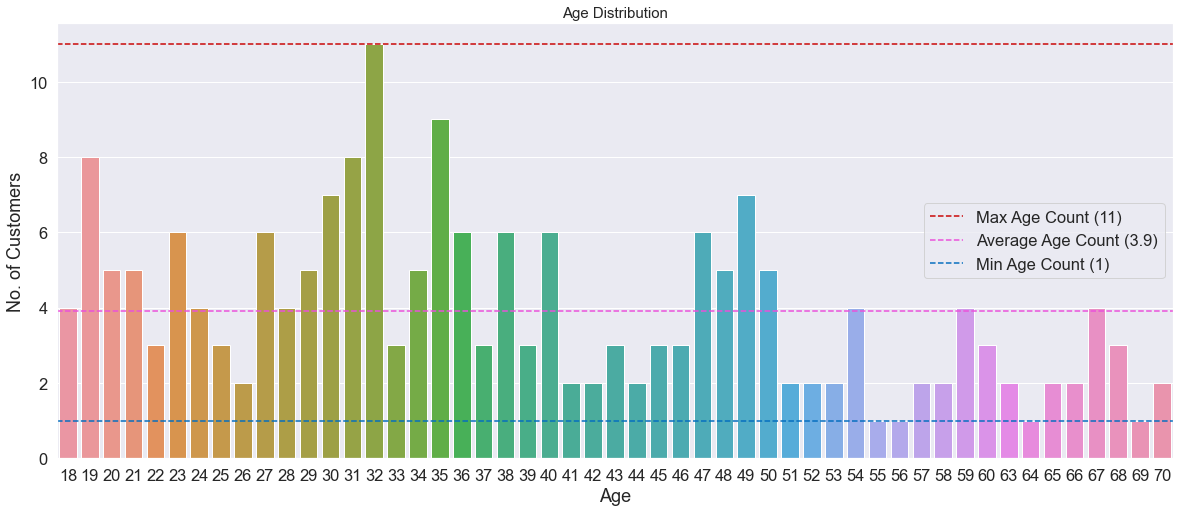

In [448]:
#Visualizing Age  Distribution
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'])
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 15)
plt.show()

In [449]:
# Gender wise Age Distribution

# Statistical Age Distribution of Male customers


data[data['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [450]:
# Statistical Age Distribution of female customers
data[data['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

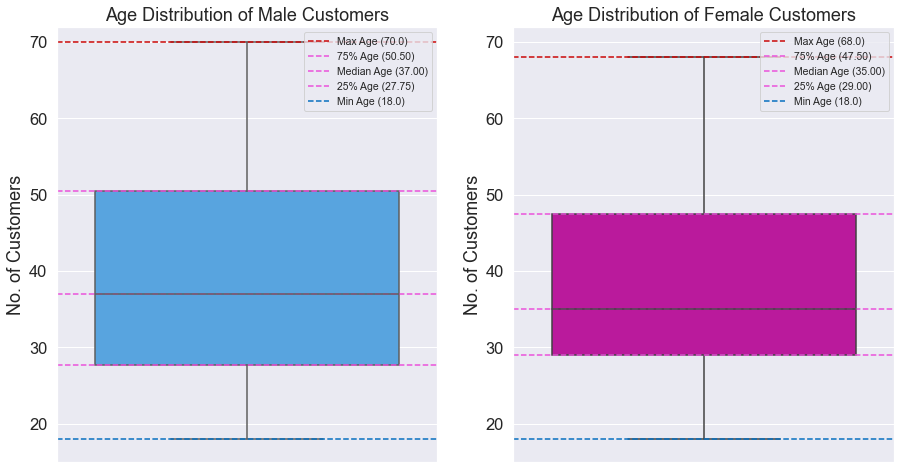

In [451]:
# Visualizing Gender wise Age Distribution of Male and Female customers
data_male = data[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

In [452]:
# Average Age of Male Customers
data[data['Gender']=='Male'].Age.mean()

39.80681818181818

In [453]:
# Counts of first five max age in the Male Customers
data[data['Gender']=='Male'].Age.value_counts().head()

19    6
32    5
48    5
59    4
40    3
Name: Age, dtype: int64

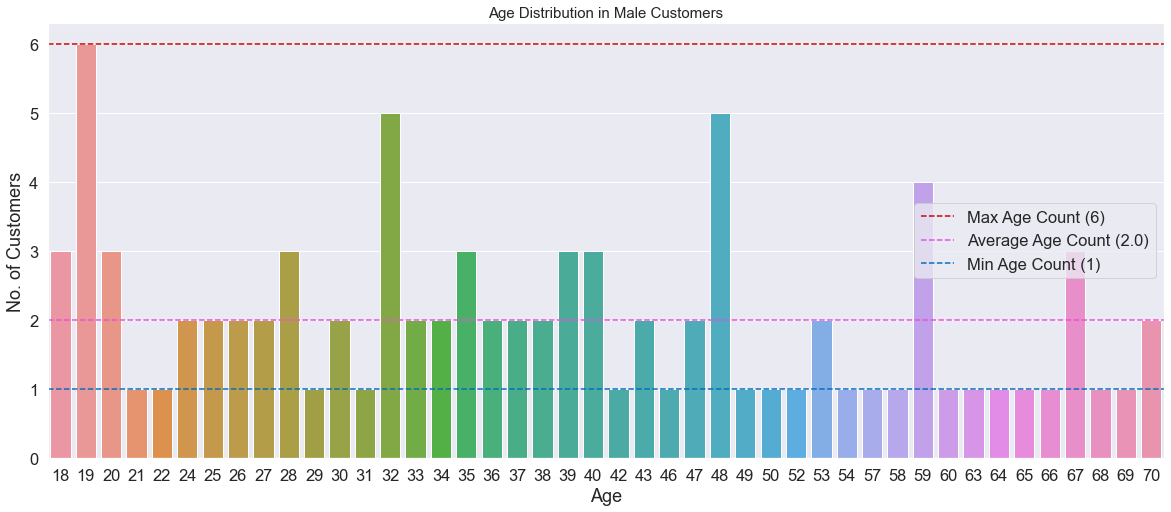

In [454]:
#Visualizing male distribution of age

maxi = data[data['Gender']=='Male'].Age.value_counts().max()
mean = data[data['Gender']=='Male'].Age.value_counts().mean()
mini = data[data['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Male'].Age)

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Distribution in Male Customers', fontsize = 15)
plt.show()

In [455]:
# Average Age of Female Customers
data[data['Gender']=='Female'].Age.mean()

38.098214285714285

In [456]:
# Counts of first five max age in the Female Customers
data[data['Gender']=='Female'].Age.value_counts().head()

31    7
35    6
32    6
23    6
49    6
Name: Age, dtype: int64

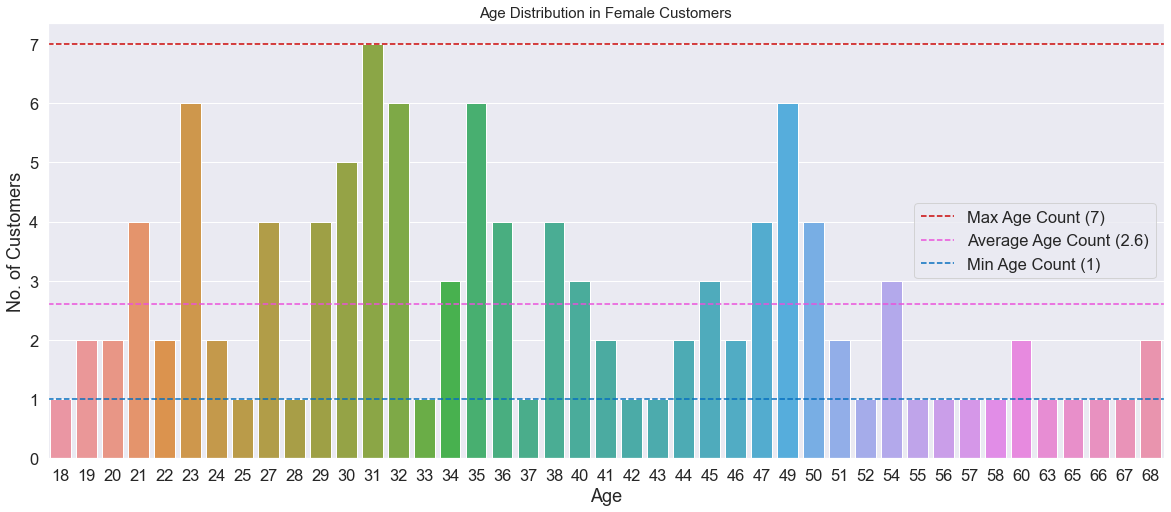

In [457]:
#Visualizing female distribution of age

maxi = data[data['Gender']=='Female'].Age.value_counts().max()
mean = data[data['Gender']=='Female'].Age.value_counts().mean()
mini = data[data['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Female'].Age)
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 15)
plt.show()

### 6. Analyzing Data  for Modelling

#### 6.1. Analyzing Annual Income data

In [458]:
#First we look at the Annual Income column
data['Annual_Income'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [459]:
# Data type of Annual Income Column
data['Annual_Income'].dtype

dtype('int64')

In [460]:
# Statistical data about Annual Income column
data['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

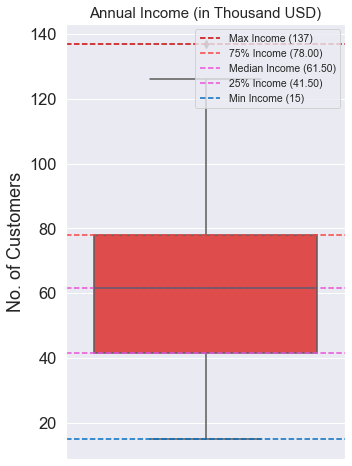

In [461]:
# Visualizing statistical data about Annual Income column
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Annual_Income"], color="#f73434")
ax.axhline(y=data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data.Annual_Income.max()})')
ax.axhline(y=data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data.Annual_Income.median():.2f})')
ax.axhline(y=data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 15)
plt.show()

In [462]:
# Distribution of Annual Income
data['Annual_Income'].value_counts().head()

54    12
78    12
60     6
87     6
62     6
Name: Annual_Income, dtype: int64

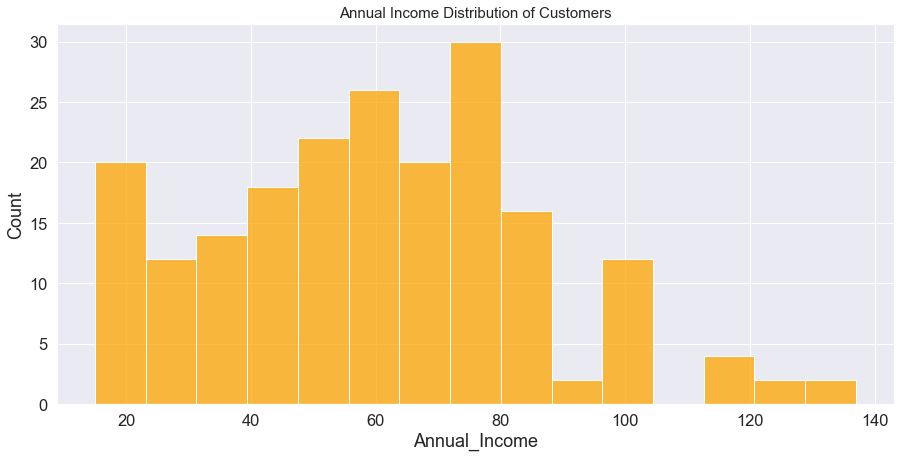

In [463]:
# Annual Income value Distribution

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(data['Annual_Income'], bins=15, ax=ax, color=['orange'])
plt.title('Annual Income Distribution of Customers', fontsize = 15)
plt.show()

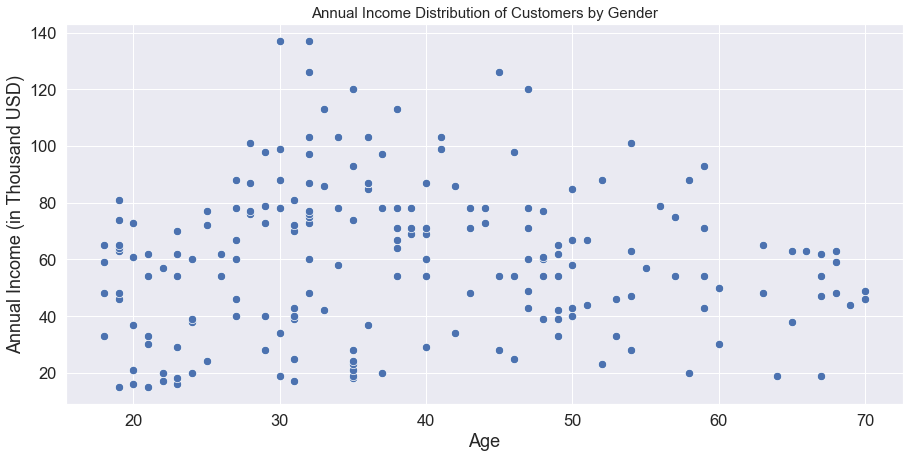

In [464]:
# Visualizing annual Income per Gender
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], s=70)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution of Customers by Gender', fontsize = 15)
plt.show()

In [465]:
# Annual Income per Gender

# Annual Income of male customer
data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

In [466]:
# Annual Income of male customer
data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

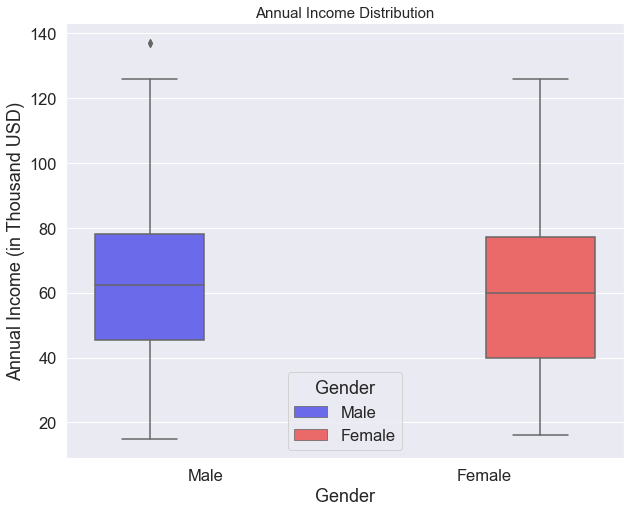

In [467]:
# Visualizing statistical difference about Spending Scores between Male and Female Customers
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual_Income"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution', fontsize = 15)
plt.show()

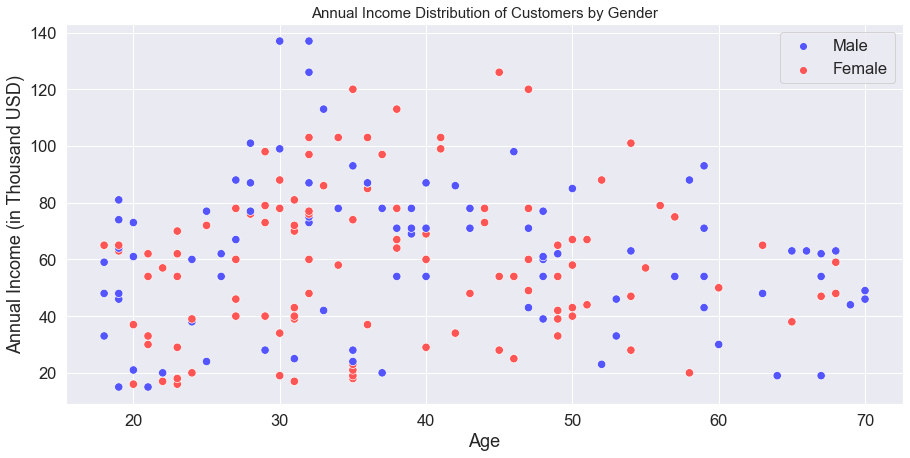

In [468]:
# Visualizing annual Income per Gender
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income Distribution of Customers by Gender', fontsize = 15)
plt.show()

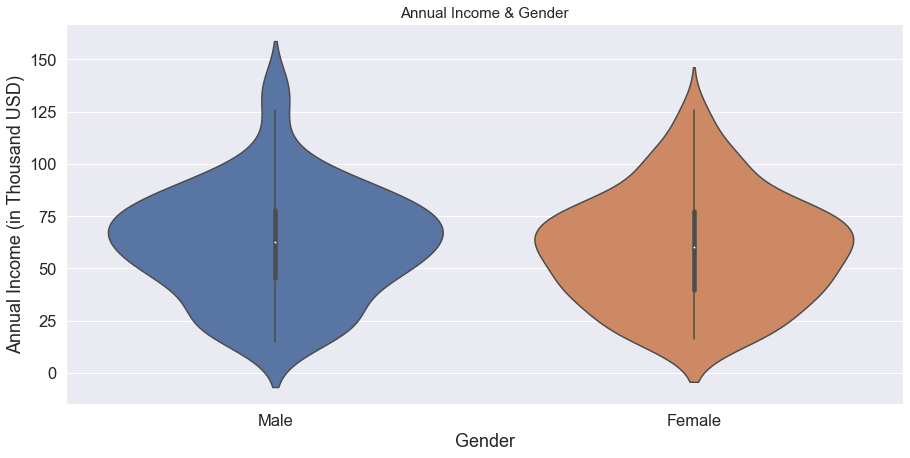

In [469]:
# Difference of Annual Income between Male and Female Customers

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Annual_Income'],x=data['Gender'])
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income & Gender', fontsize = 15)
plt.show()

#### 6.2. Analyzing Spending Score data

In [470]:
# First we look at the Spending Score column
data['Spending_Score'].head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score, dtype: int64

In [471]:
# Data type of Spending scores Column
data['Spending_Score'].dtype

dtype('int64')

In [472]:
# Statistical Data of Spending Scores Column
data['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

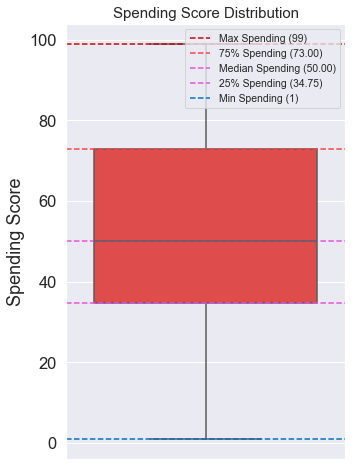

In [473]:
# Visualizing statistical data about Annual Income column
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data['Spending_Score'], color="#f73434")
ax.axhline(y=data['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({data.Spending_Score.max()})')
ax.axhline(y=data['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({data.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=data['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({data.Spending_Score.median():.2f})')
ax.axhline(y=data['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({data.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=data['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({data.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution', fontsize = 15)
plt.show()

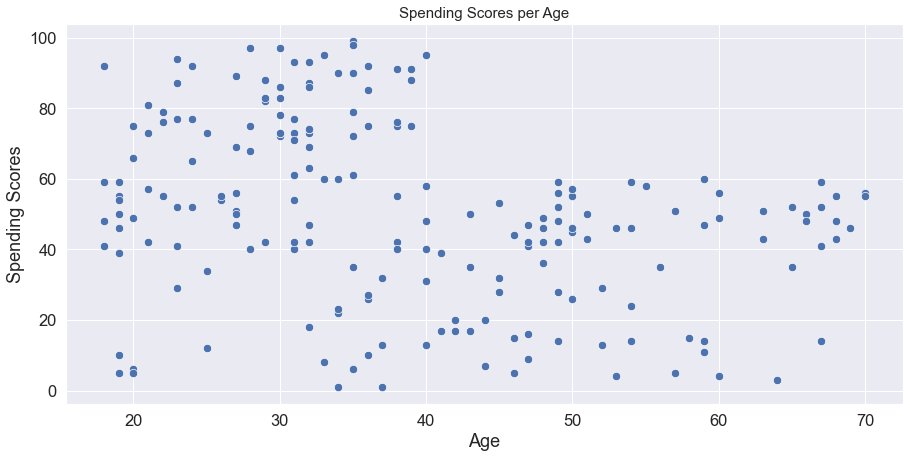

In [474]:
# Spending Scores per Age
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], s=70)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 15)
plt.show()

In [475]:
# Spending Scores per Gender

# Spending Scores of male customer
data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

In [476]:
# Spending Scores of male customer
data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

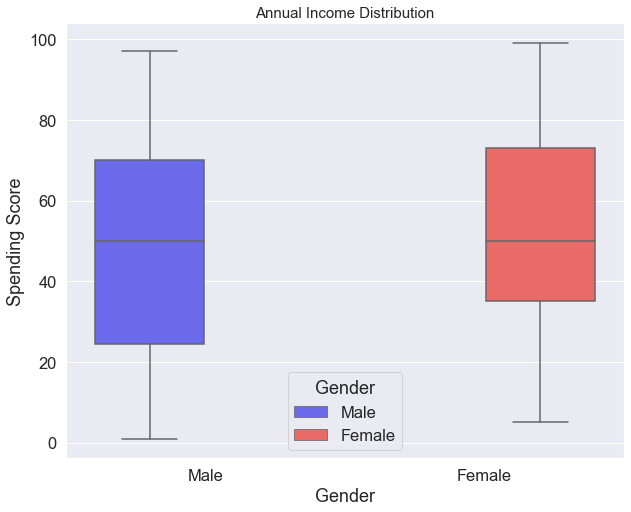

In [477]:
# Visualizing statistical difference about Spending Scores between Male and Female Customers
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending_Score"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Annual Income Distribution', fontsize = 15)
plt.show()

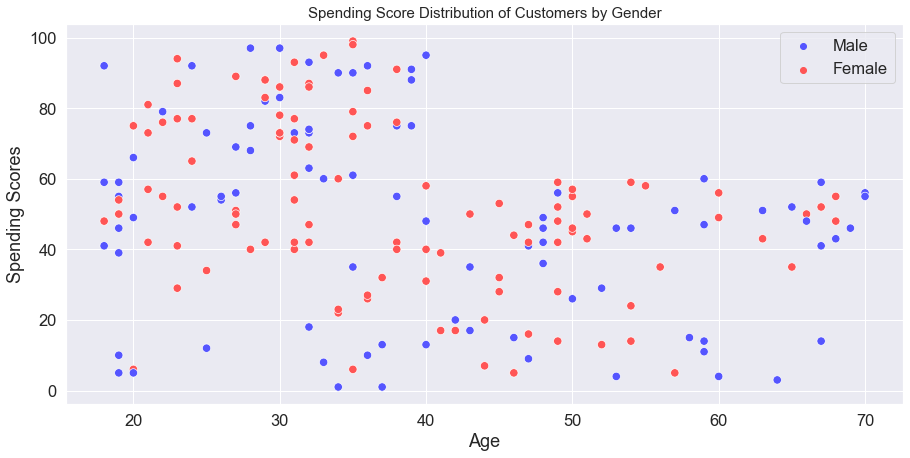

In [478]:
# Visualizing Spending Scores per Gender
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score Distribution of Customers by Gender', fontsize = 15)
plt.show()

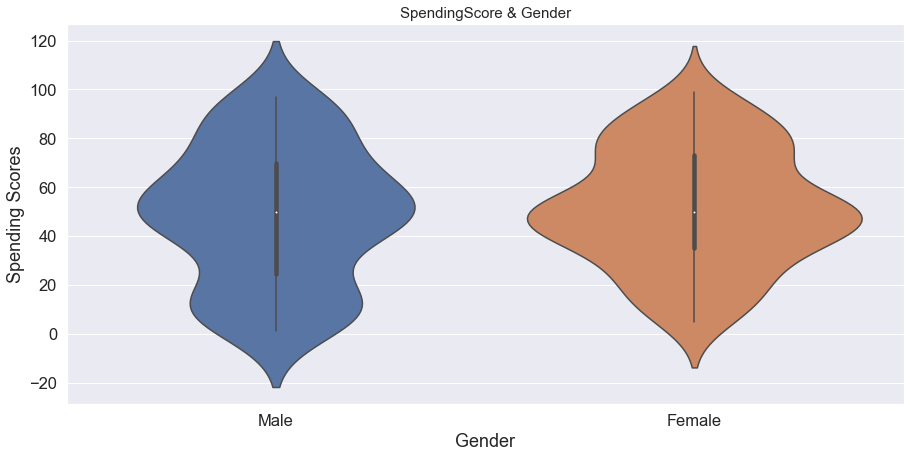

In [479]:
# Difference Between Spending Score of Male and Female Customers

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Spending_Score'],x=data['Gender'])
ax.set_ylabel('Spending Scores')

plt.title('SpendingScore & Gender', fontsize = 15)
plt.show()

#### K - Means Clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

First we need to check the data for any missing values as it can ruin our model.

In [480]:
data.isna().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

We conclude that we don't have any missing values therefore we can go forward and start the clustering procedure.

We will now view and select the data that we need for clustering.

In [481]:
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [491]:
clustering_data = data.iloc[:,[2,3]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Now, we need to visualize the data which we are going to use for the clustering.
This will give us a fair idea about the data we're working on.

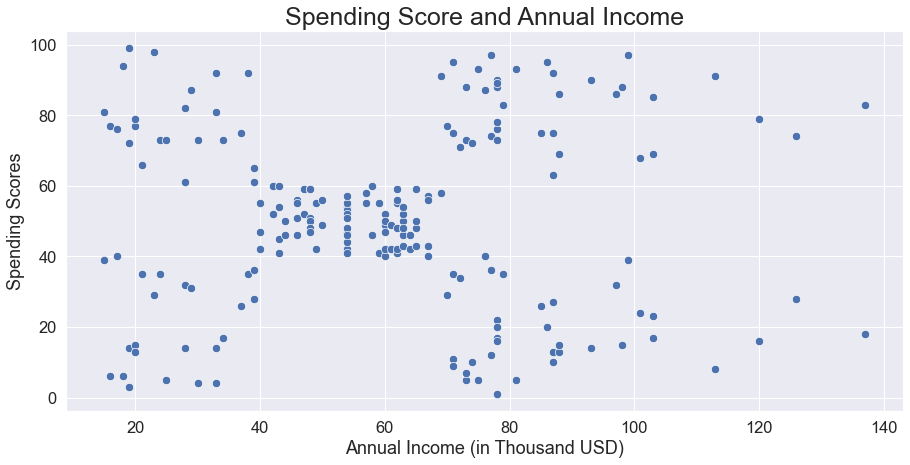

In [492]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score and Annual Income', fontsize = 25)
plt.show()

This gives us a fair Idea and patterns about some of the data. 

### 7. Determining No. of Clusters Required

**The Elbow Method**

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

![formula](formula.png)

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

With this simple line of code we get all the inertia value or the within the cluster sum of square.

In [496]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181665.82312925, 106348.37306211,  73679.78903949,
        44448.45544793,  37239.83554246,  30273.39431207,  25011.83934916,
        22135.03507493,  19657.7836087 ,  18079.02170394,  16193.77289136,
        14263.52772037,  13773.58003465,  12000.01933252,  10976.63073593,
        10135.02685303,   9323.10472028,   8814.52136527,   8305.66952229,
         7739.72809694,   7170.02673438,   6641.38790636,   6479.87936508,
         6132.66587302,   5693.23766511,   5419.54332612,   5224.61169109,
         4938.02907648])

Inertia can be recognized as a measure of how internally coherent clusters are.

Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

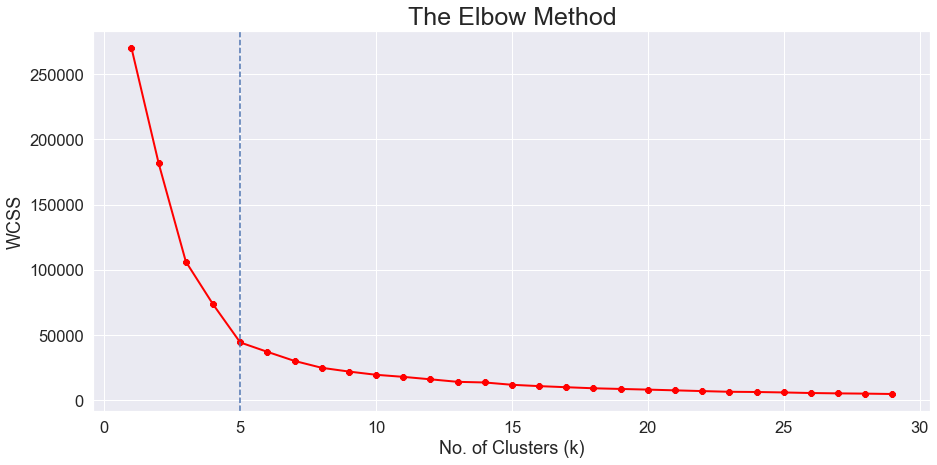

In [497]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 25)
plt.show()

It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.

### 8. Clustering

Now we will build the model for creating clusters from the dataset.
We will use `n_clusters = 5` i.e. 5 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for  unsupervised learning therefore we will use `fit_predict()`
Suppose we were working with  supervised learning data set we would use `fit_tranform()`

In [498]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5)
kms.fit(clustering_data)

KMeans(n_clusters=5)

Now that we have the clusters created, we will enter them into a different column

In [501]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(x)
clusters.head()

,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


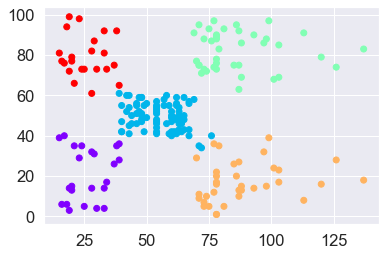

In [504]:
plt.scatter(clusters['Annual_Income'], clusters['Spending_Score'], c=clusters['Cluster_Prediction'], cmap='rainbow')
plt.show()